# <center> *USA - Country Report* <center/>
## <center> *Date: 07.12.2020* <center/>
## <center> *By: Tal Levi* <center/>

In [41]:
import pandas as pd
from analysis.classes import Country
from datetime import datetime, date
import plotly
plotly.io.orca.config.executable = r'C:\Users\talle\AppData\Local\Programs\orca\orca.exe'
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [42]:
country = Country('usa')
df = country.data  # Pandas df object, that contains the data from the db.


### Part One - Data information

In [43]:
print(country)


Countries name: Usa
Countries id: 1
Continent: North America
Continent id: 1
Population: 331171664
First update: 2020-08-02
Last update: 2020-12-07
Data number of rows: 113
Data number of columns: 18
Columns: 
['scrap_date', 'scrap_time', 'update_time_GMT', 'Country_id', 'Country', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'SeriousCritical', 'Tot_Cases_1Mpop', 'Deaths_1Mpop', 'TotalTests', 'Tests_1Mpop']
		


In [44]:
df.dtypes

scrap_date         datetime64[ns]
scrap_time                 object
update_time_GMT            object
Country_id                  int64
Country                    object
Population                  int64
TotalCases                  int64
NewCases                  float64
TotalDeaths                 int64
NewDeaths                 float64
TotalRecovered              int64
NewRecovered              float64
ActiveCases                 int64
SeriousCritical             int64
Tot_Cases_1Mpop             int64
Deaths_1Mpop              float64
TotalTests                  int64
Tests_1Mpop                 int64
dtype: object

In [45]:

print('Number of null values are:')
pd.DataFrame(df.isnull().sum()).rename(columns = {0:'null_count'})

Number of null values are:


,null_count
scrap_date,0
scrap_time,0
update_time_GMT,59
Country_id,0
Country,0
Population,0
TotalCases,0
NewCases,1
TotalDeaths,0
NewDeaths,1


In [46]:
print('The first five rows of the data:')
df.head(5)

The first five rows of the data:


,scrap_date,scrap_time,update_time_GMT,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
0,2020-08-02,20:00:00,NaN,1,USA,331171664,4778177,nan,158039,nan,2363229,nan,2256909,18720,14428,477.000,59259593,178939
1,2020-08-08,20:00:00,NaN,1,USA,331203424,5120955,342778.000,164577,6538.000,2620147,256918.000,2336231,18038,15462,497.000,64096129,193525
2,2020-08-12,20:00:00,NaN,1,USA,331224597,5306851,185896.000,167761,3184.000,2756107,135960.000,2382983,17339,16022,506.000,66944595,202112
3,2020-08-16,20:00:00,NaN,1,USA,331245770,5530028,223177.000,172608,4847.000,2904130,148023.000,2453290,17186,16695,521.000,70228171,212012
4,2020-08-17,20:00:00,NaN,1,USA,331251064,5579686,49658.000,173258,650.000,2928179,24049.000,2478249,17237,16844,523.000,71149490,214790


In [47]:
print('The last five rows of the data.:')
df.tail(5)


The last five rows of the data.:


,scrap_date,scrap_time,update_time_GMT,Country_id,Country,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,SeriousCritical,Tot_Cases_1Mpop,Deaths_1Mpop,TotalTests,Tests_1Mpop
108,2020-12-03,23:00:00,20:59:00,1,USA,331822744,14463929,209911.000,281939,2786.000,8525787,107289.000,5656203,26166,43589,850.000,200943673,605575
109,2020-12-04,23:00:00,20:57:00,1,USA,331828037,14703168,239239.000,284826,2887.000,8624929,99142.000,5793413,26182,44310,858.000,202848144,611305
110,2020-12-05,23:00:00,20:58:00,1,USA,331833330,14927533,224365.000,287309,2483.000,8755566,130637.000,5884658,26158,44985,866.000,205305589,618701
111,2020-12-06,23:00:00,20:51:00,1,USA,331838624,15113903,186370.000,288645,1336.000,8836871,81305.000,5988387,26245,45546,870.000,207004899,623812
112,2020-12-07,23:00:00,20:57:00,1,USA,331843917,15296309,182406.000,289917,1272.000,8930355,93484.000,6076037,26457,46095,874.000,208740728,629033


### Part Two - Data Visualization
#### Cumulative data

In [48]:
country.linear_plot(['TotalCases', 'TotalDeaths','TotalRecovered','ActiveCases'],save = True)

#### Three months measures

In [49]:
months_info = country.three_months_info()
months_info

,Year,Month,ActiveCasesAvg,RecoveredSum,DeathsSum,CasesSum,CriticalSum
0,2020,Sep,"2,540,447.345","1,248,280","23,965","1,246,816","418,498"
1,2020,Oct,"2,729,811.067","1,381,695","24,565","1,955,529","461,815"
2,2020,Nov,"4,233,092.600","2,125,846","38,027","4,487,702","650,288"


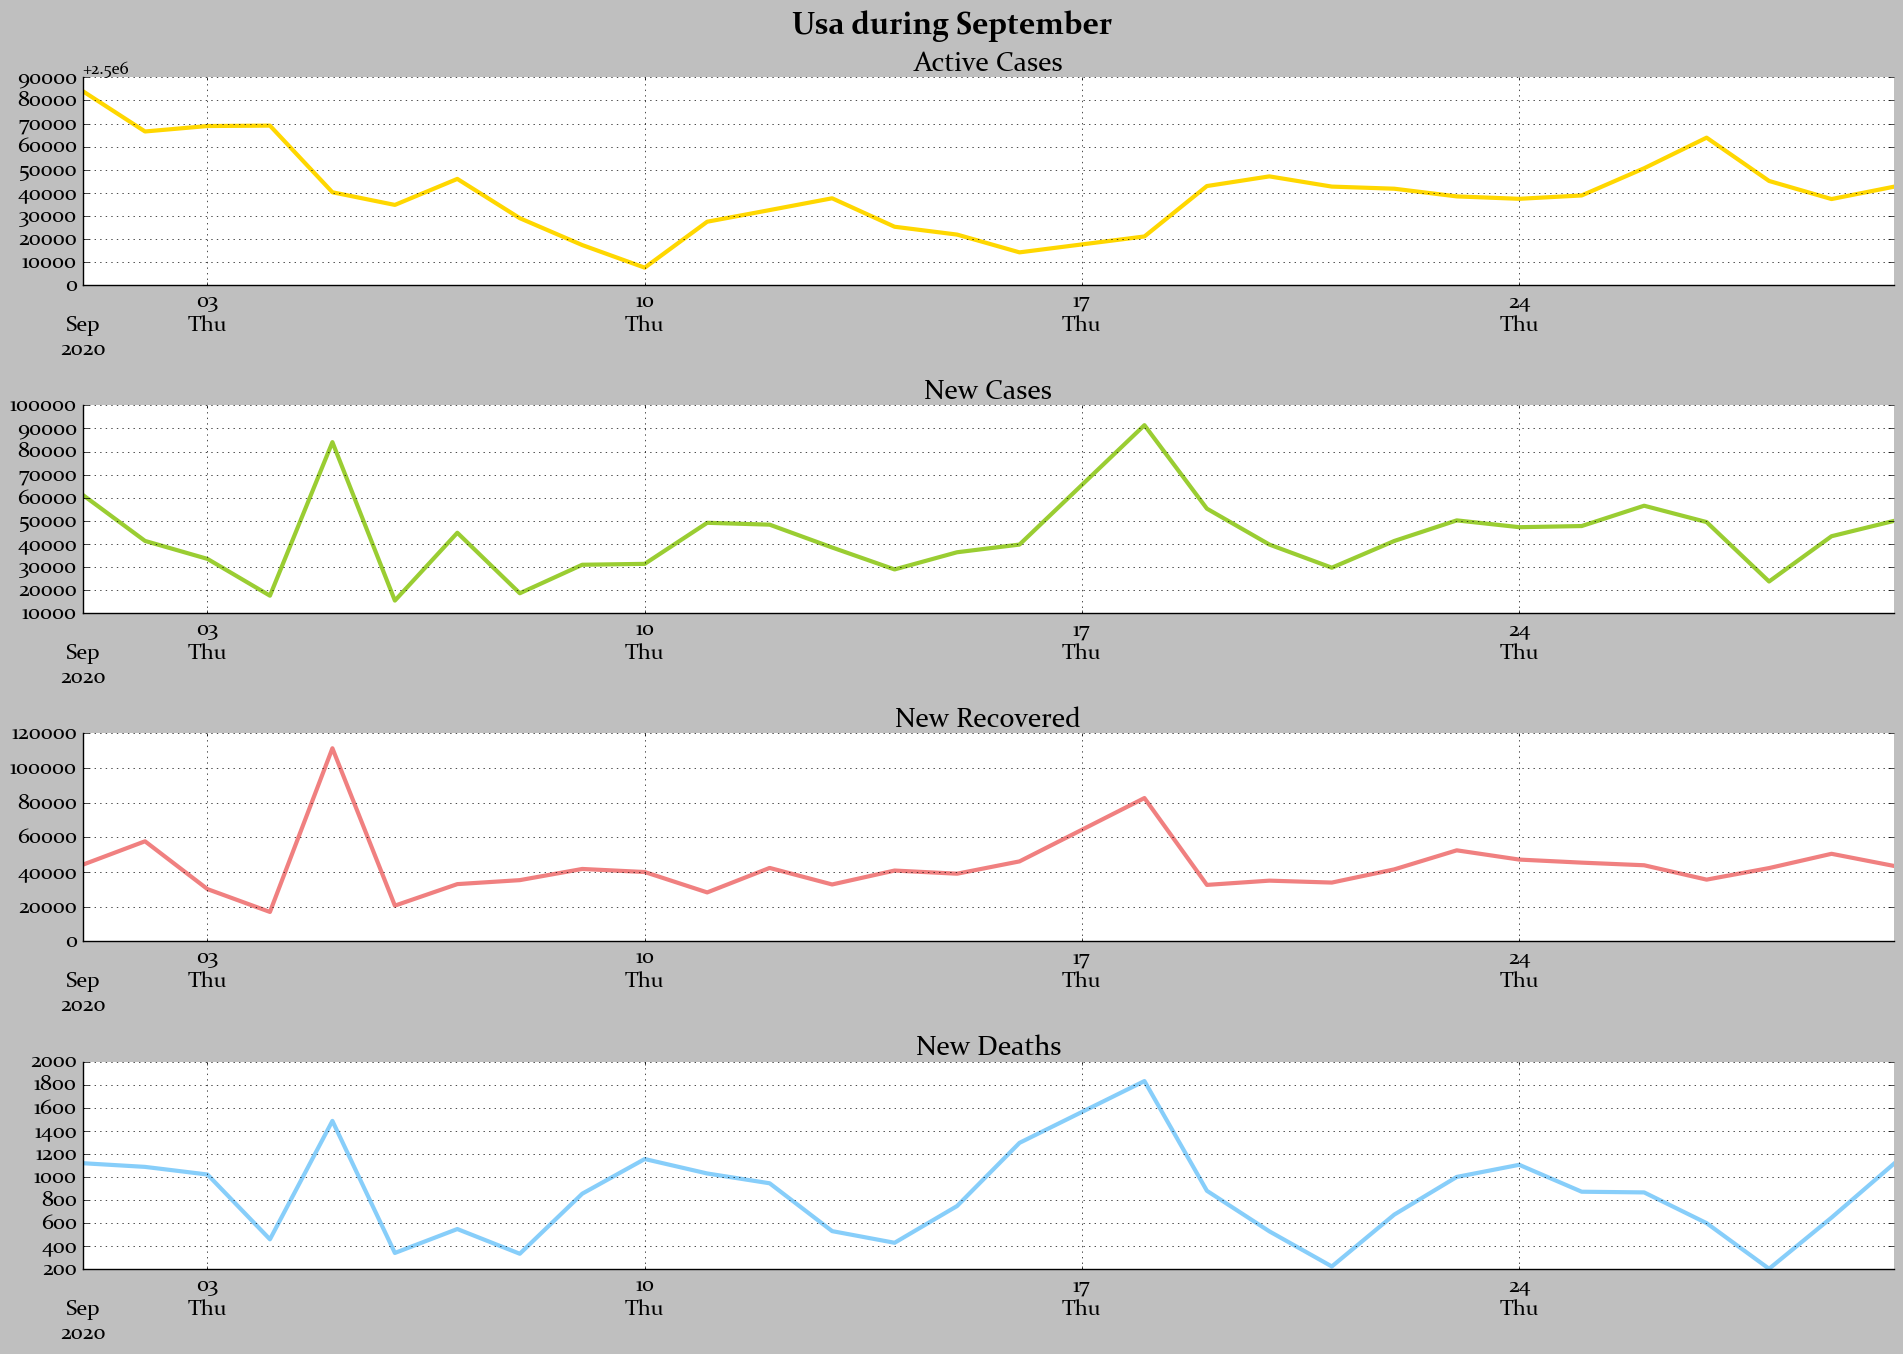

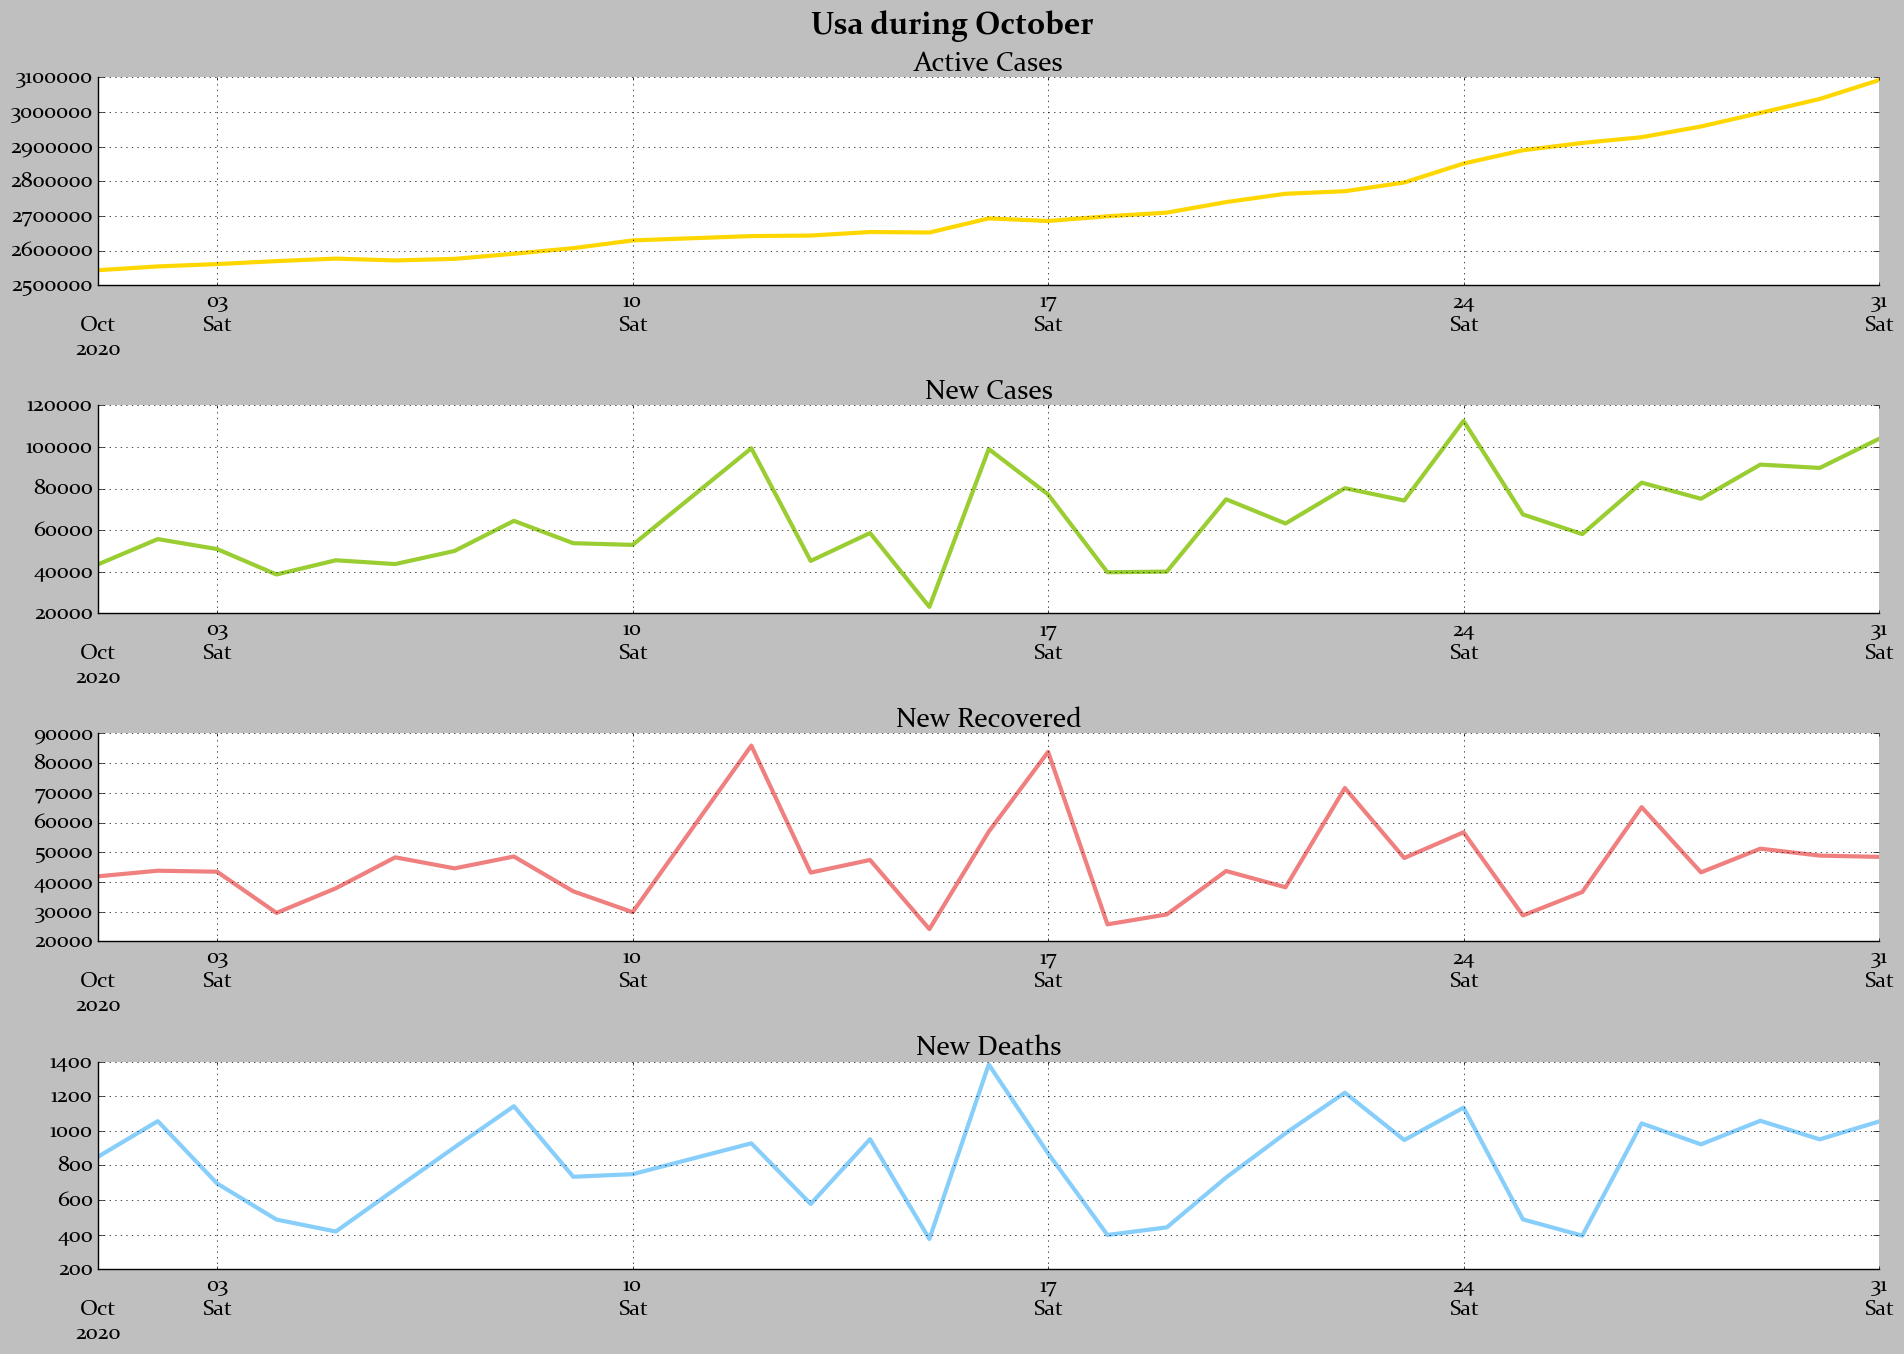

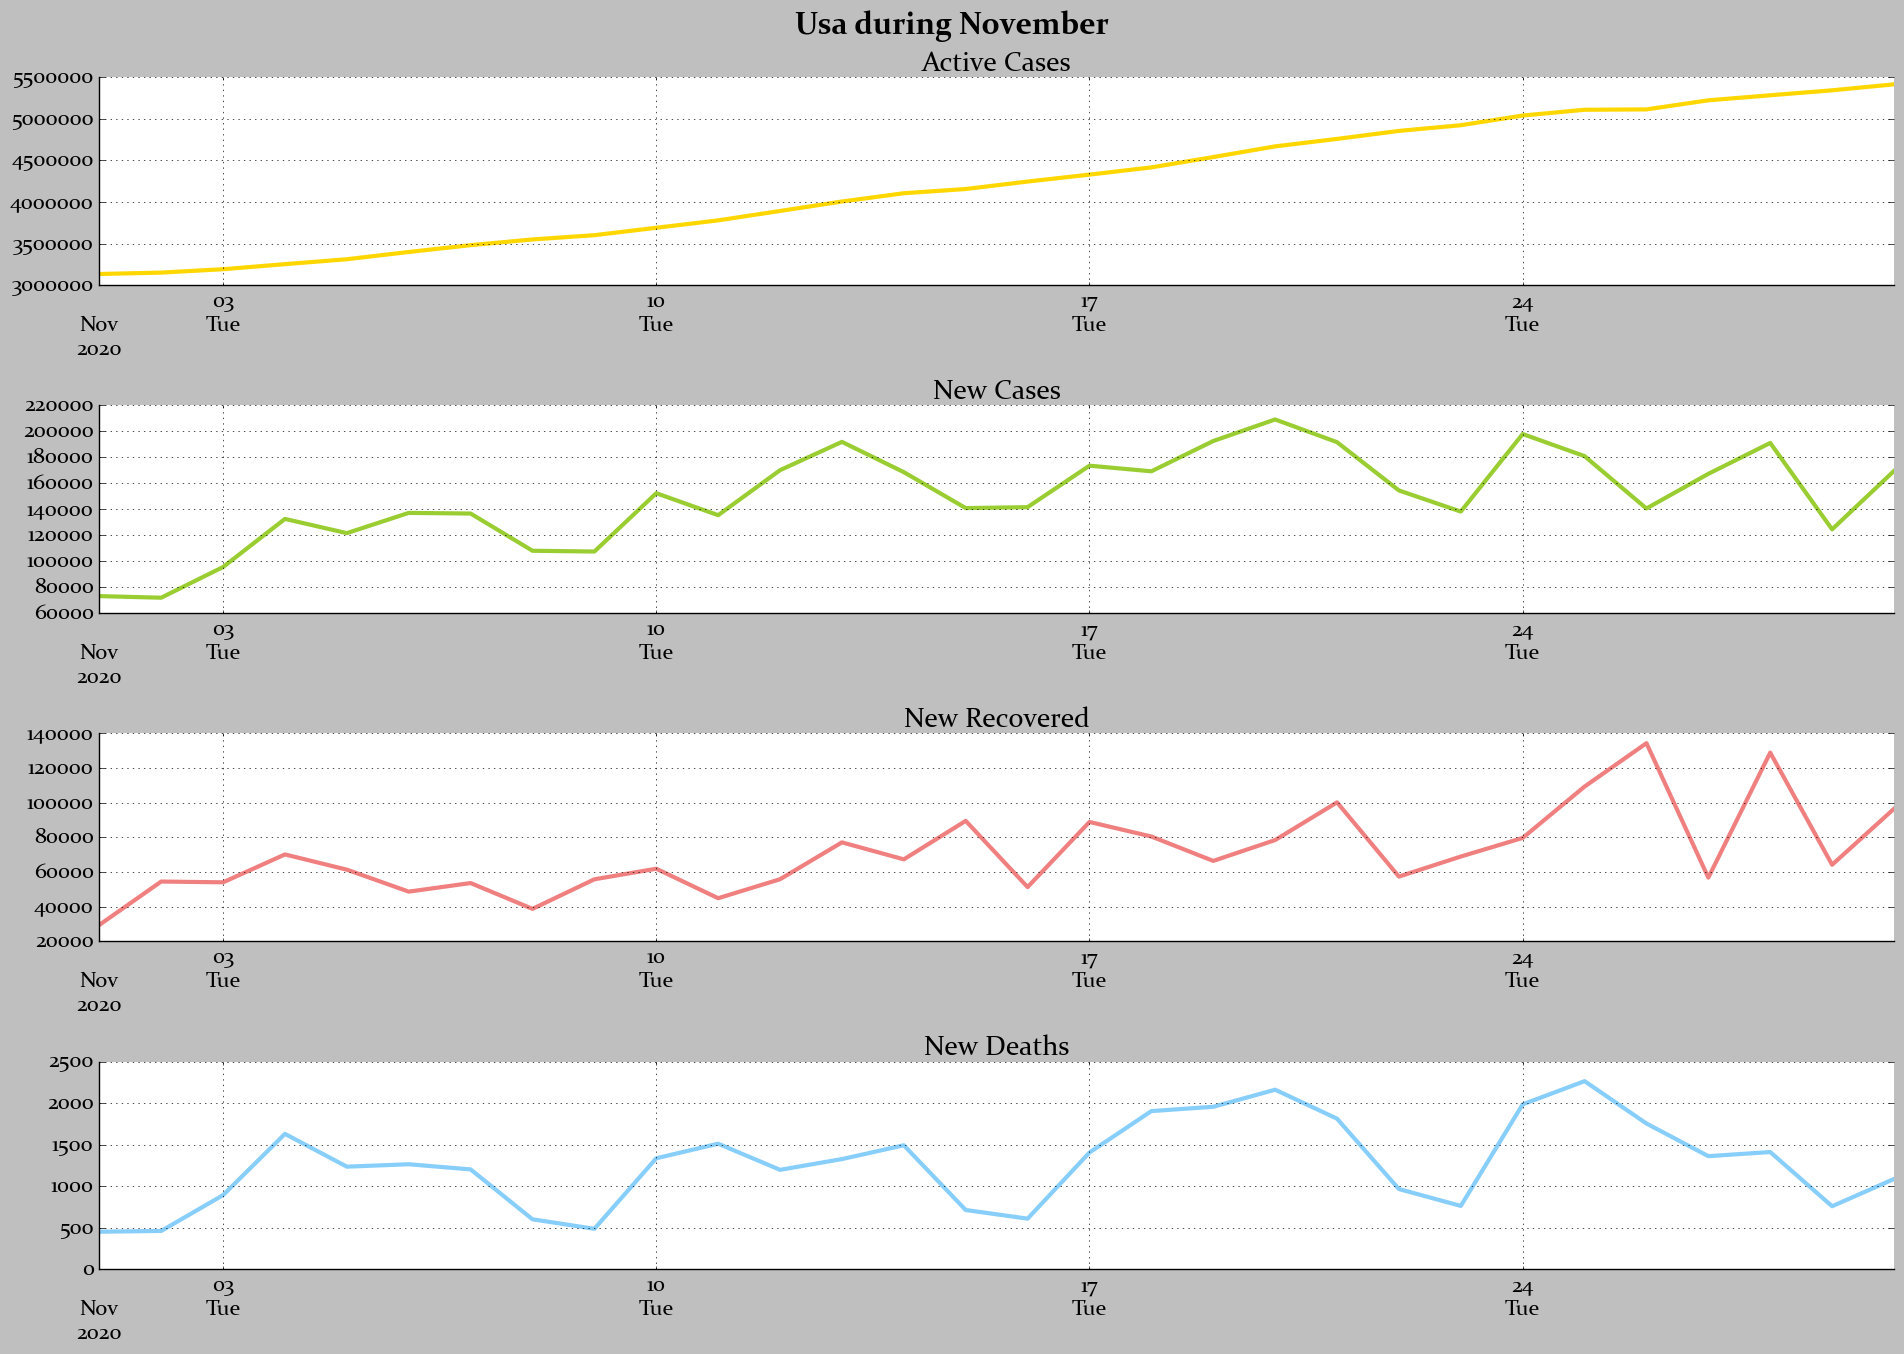

In [50]:
monthName = datetime(1900, date.today().month, 1).strftime('%B')
for month in months_info['Month'].tolist():
    month_num = datetime.strptime(month[:3], "%b").month
    country.monthly_plot(['ActiveCases','NewCases','NewRecovered','NewDeaths'],month_num,date.today().year,save = True)

#### Daily increases in deaths, recoveries, active cases,new cases.

In [51]:
country.daily_increase3(save = True)


#### Closed cases ratio
$$TotalRecovered + TotalDeaths = TotalCases - ActiveCases$$

Answer:
    TotalRecovered TotalDeaths
112        96.856%      3.144%
Total time taken in closed_cases_pie function is: 0.002116666666666667 minutes.


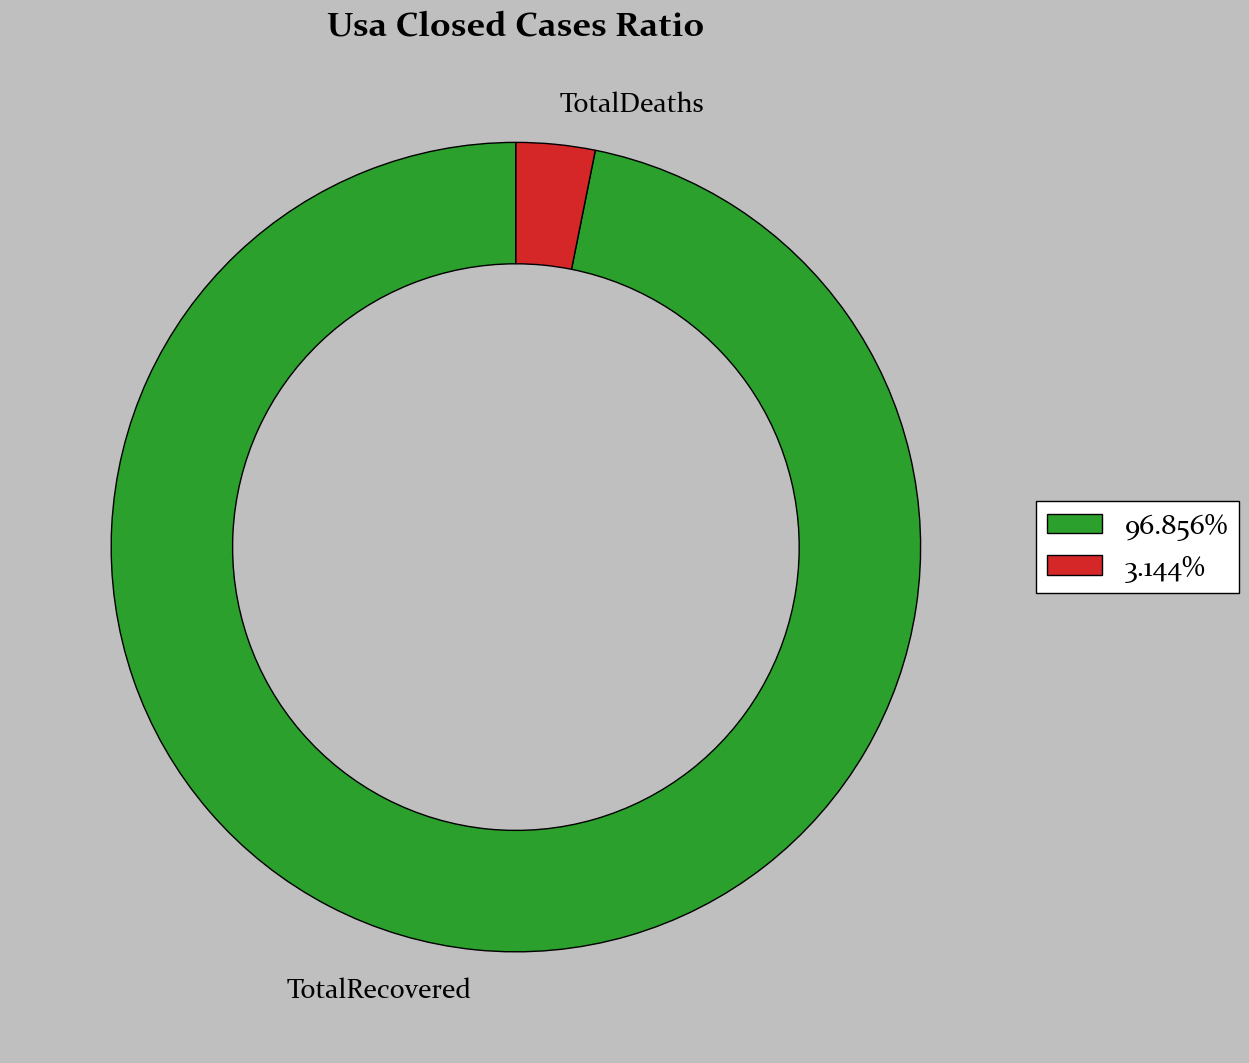

In [52]:
updated_totals = df[df['scrap_date'].dt.date == country.last_update]\
    [['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalDeaths']]
res = (updated_totals[['TotalRecovered', 'TotalDeaths']] / (updated_totals['TotalCases']\
                                             .values[0] - updated_totals['ActiveCases'].values[0])) * 100
res = round(res, 3).astype(str) + '%'
print('Answer:')
print(res)
country.closed_cases_pie(save = True)

#### Measures Boxplot

In [53]:
country.boxplot(['ActiveCases'], save=True)

In [54]:
measures = ['NewCases','NewRecovered']
country.boxplot(measures, save=True)

In [55]:
country.boxplot(['NewDeaths'], save=True)

### Part Three - Basic Analysis

In [56]:
print("Q1.Find the date of the day with the highest New Cases.")
res_date = df[df['NewCases'] == df['NewCases'].max()]['scrap_date'].dt.date
print('Answer:')
pd.DataFrame(res_date)

Q1.Find the date of the day with the highest New Cases.
Answer:


,scrap_date
1,2020-08-08


In [57]:
print("Q2.Find the countries Case Fatality Ratio")
print('Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)')
country.case_fatality_ratio().astype('str') + '%'



Q2.Find the countries Case Fatality Ratio
Answer: CFR= TotalDeaths/(TotalDeaths + TotalRecovered)


'4.005%'